<a href="https://colab.research.google.com/github/rahiakela/opencv-projects-and-guide/blob/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/1_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection using OpenCV

Face processing is a hot topic in artificial intelligence because a lot of information can be automatically extracted from faces using computer vision algorithms. 

The face plays an important role in visual communication because a great deal of non-verbal information, such as identity, intent, and emotion, can be extracted from human faces. 

Face processing is a really interesting topic for computer vision learners because it touches on different areas of expertise, such as object detection, image processing, and landmark detection or object tracking.

In this notebook, you will be introduced to the main topics related to face processing using state-of-the-art algorithms and techniques in order to achieve impressive results.

We will cover the following topics:

- Face processing introduction
- Face detection
- Detecting facial landmarks
- Face tracking
- Face recognition

## Setup

In [ ]:
%%shell

pip install dlib
pip install face_recognition
pip install cvlib

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import dlib
import face_recognition
import cvlib as cv

In [ ]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/test_face_detection.jpg
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalface_alt2.xml
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalface_default.xml

In [6]:
def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

In [7]:
# Load image and convert to grayscale
img = cv2.imread("test_face_detection.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Face processing introduction

In order to introduce this notebook, we will be using different approaches throughout all the sections to see the different possibilities you have at hand to solve a concrete face processing task, and it can be helpful to have a high-level overview of all of these alternatives.

<img src='https://github.com/rahiakela/img-repo/blob/master/object-detection-images/face-processing.png?raw=1' width='800'/>

As you can see, four main points are going to be tackled here:

- **Face detection** is a specific case of object detection, where the task is to find both the locations and sizes of all the faces in an image.
- **Facial landmarks detection** is a specific case of landmarks detection, where the task is to locate the main landmarks in a face.
- **Face tracking** is a specific case of object tracking, where the task is to find both the locations and sizes of all the moving faces in a video by taking into account the extra information that can be extracted in consecutive frames of the video.
- **Face recognition** is a specific case of object recognition, where a person is identified or verified from an image or video using the information extracted
from the face:
  - **Face identification (1:N)**: The task is to find the closest match from
an unknown person in a collection of known faces.
  - **Face verification (1:1)**: The task is to check whether the person is
who they claim to be.

## Face detection

Face detection, which can be defined as the task of determining the location and size of faces in digital images, is usually the first key step when building face processing applications like:-

- facial expression recognition, 
- drowsiness detection, 
- gender classification, 
- face recognition, 
- head-pose estimation, or 
- human-computer interaction

This is because the aforementioned applications requires as an input the location and size of the detected faces. Therefore, automatic face detection plays a critical role, and is one of the most studied topics in the artificial intelligence community.

Face detection seems like an effortless task for a human, but it is a very challenging task for computers because many problems/challenges are usually involved.

In this section, we will see some of the most popular face detection techniques that the OpenCV library and the dlib and face_processing packages provide.

## Face detection with OpenCV

OpenCV provides two approaches for face detection:

- Haar cascade based face detectors
- Deep learning-based face detectors

To performs face detection using haar featurebased cascade classifiers. In this sense, OpenCV provides four cascade classifiers to use for (frontal) face detection:

- `haarcascade_frontalface_alt.xml` (FA1): 22 stages and 20 x 20 haar
features
- `haarcascade_frontalface_alt2.xml` (FA2): 20 stages and 20 x 20 haar
features
- `haarcascade_frontalface_alt_tree.xml` (FAT): 47 stages and 20 x 20 haar
features
- `haarcascade_frontalface_default.xml` (FD): 25 stages and 24 x 24 haar
features

Overall, it can be concluded that these classifiers achieve similar accuracy. That is why we will be using two of them.


In [ ]:
def show_detection(image, faces):
    """Draws a rectangle over each detected face"""

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 5)
    return image

In [ ]:
# Load cascade classifiers
cas_alt2 = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
cas_default = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

The next step is to perform the detection.

In [ ]:
faces_alt2 = cas_alt2.detectMultiScale(img_gray)
faces_default = cas_default.detectMultiScale(img_gray)

In [ ]:
faces_alt2

array([[332,  93, 364, 364],
       [695, 104, 256, 256]], dtype=int32)

In [ ]:
faces_default

array([[321,  84, 385, 385],
       [697, 107, 248, 248],
       [ 88,  75, 316, 316],
       [894, 573,  52,  52]], dtype=int32)

The final step is to correlate the results using the show_detection() function:

In [ ]:
img_faces_alt2 = show_detection(img.copy(), faces_alt2)
img_faces_default = show_detection(img.copy(), faces_default)

OpenCV also provides the cv2.face.getFacesHAAR() function to detect faces.

In [ ]:
retval, faces_haar_alt2 = cv2.face.getFacesHAAR(img, "haarcascade_frontalface_alt2.xml")
retval, faces_haar_default = cv2.face.getFacesHAAR(img, "haarcascade_frontalface_alt2.xml")

It should be noted that cv2.CascadeClassifier.detectMultiScale() needs a
grayscale image, while cv2.face.getFacesHAAR() needs a BGR image as an input.
Moreover, cv2.CascadeClassifier.detectMultiScale() outputs the detected faces
as a list of rectangles.

In [ ]:
faces_haar_alt2

array([[[693, 105, 258, 258]],

       [[103,  64, 298, 298]],

       [[330, 101, 358, 358]]], dtype=int32)

In [ ]:
faces_haar_default

array([[[693, 105, 258, 258]],

       [[103,  64, 298, 298]],

       [[330, 101, 358, 358]]], dtype=int32)

To get rid of the useless one-dimension arrays, call np.squeeze().

In [ ]:
faces_haar_alt2 = np.squeeze(faces_haar_alt2)
faces_haar_alt2

array([[693, 105, 258, 258],
       [103,  64, 298, 298],
       [330, 101, 358, 358]], dtype=int32)

In [ ]:
faces_haar_default = np.squeeze(faces_haar_default)
faces_haar_default

array([[693, 105, 258, 258],
       [103,  64, 298, 298],
       [330, 101, 358, 358]], dtype=int32)

In [ ]:
# Draw face detections
img_faces_alt2 = show_detection(img.copy(), faces_alt2)
img_faces_default = show_detection(img.copy(), faces_default)
img_faces_haar_alt2 = show_detection(img.copy(), faces_haar_alt2)
img_faces_haar_default = show_detection(img.copy(), faces_haar_default)

The final step is to show the four created images by using OpenCV, or Matplotlib in this case.

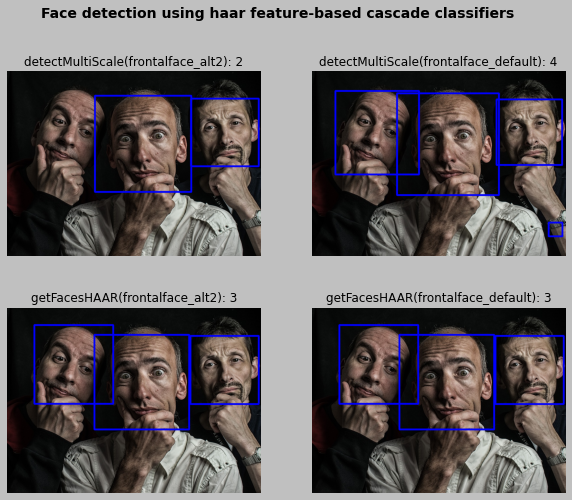

In [ ]:
# Create the dimensions of the figure and set title
fig = plt.figure(figsize=(10, 8))
plt.suptitle("Face detection using haar feature-based cascade classifiers", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images
show_img_with_matplotlib(img_faces_alt2, "detectMultiScale(frontalface_alt2): " + str(len(faces_alt2)), 1)
show_img_with_matplotlib(img_faces_default, "detectMultiScale(frontalface_default): " + str(len(faces_default)), 2)
show_img_with_matplotlib(img_faces_haar_alt2, "getFacesHAAR(frontalface_alt2): " + str(len(faces_haar_alt2)), 3)
show_img_with_matplotlib(img_faces_haar_default, "getFacesHAAR(frontalface_default): " + str(len(faces_haar_default)), 4)

plt.show()

As you can see, the detected faces vary using the four aforementioned approximations by using haar feature-based cascade classifiers. Finally, it should also be commented that the `cv2.CascadeClassifier.detectMultiScale()` function has the minSize and maxSize parameters in order to establish the minimum size (objects smaller than minSize will not be detected) and the maximum size (objects larger than maxSize will not be detected), respectively. On the contrary, the `cv2.face.getFacesHAAR()` function does not offer this possibility.

**Haar feature-based cascade classifiers can be used to detect objects other than human faces. The OpenCV library also provides two cascade files to use for cat face detection.**

Indeed, the key modification is the two cascade files that have been loaded. In this case, here are the two loaded cascade files:

- `haarcascade_frontalcatface.xml`: A frontal cat face detector using the basic
set of haar features with 20 stages and 24 x 24 haar features
- `haarcascade_frontalcatface_extended.xml`: A frontal cat face detector
using the full set of haar features with 20 stages and 24 x 24 haar features

In [ ]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/test_cat_face_detection.jpg
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalcatface.xml
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalcatface_extended.xml

In [ ]:
# Load image and convert to grayscale
img = cv2.imread("test_cat_face_detection.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Load cascade classifiers
cas_catface = cv2.CascadeClassifier("haarcascade_frontalcatface.xml")
cas_catface_extended  = cv2.CascadeClassifier("haarcascade_frontalcatface_extended.xml")

In [ ]:
# Detect faces:
faces_cas_catface = cas_catface.detectMultiScale(img_gray)
faces_cas_catface_extended = cas_catface_extended.detectMultiScale(img_gray)
retval, faces_haar_cat = cv2.face.getFacesHAAR(img, "haarcascade_frontalcatface.xml")
faces_haar_cat = np.squeeze(faces_haar_cat)
retval, faces_haar_cat_extended = cv2.face.getFacesHAAR(img, "haarcascade_frontalcatface_extended.xml")
faces_haar_cat_extended = np.squeeze(faces_haar_cat_extended)

In [ ]:
# Draw cat face detections:
img_cas_catface = show_detection(img.copy(), faces_cas_catface)
img_cas_catface_extended = show_detection(img.copy(), faces_cas_catface_extended)
img_faces_haar_cat = show_detection(img.copy(), faces_haar_cat)
img_faces_haar_cat_extended = show_detection(img.copy(), faces_haar_cat_extended)

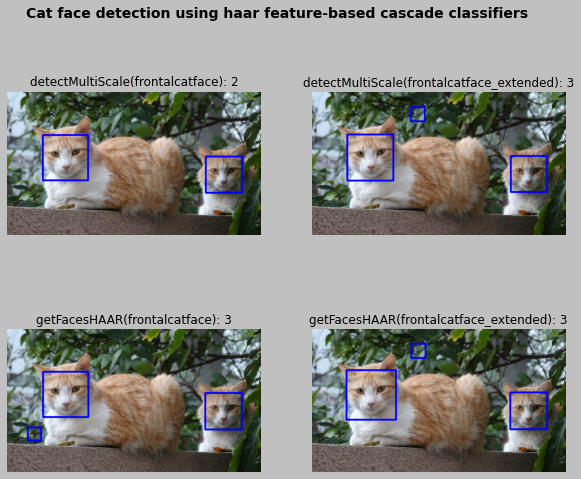

In [ ]:
# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(10, 8))
plt.suptitle("Cat face detection using haar feature-based cascade classifiers", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images:
show_img_with_matplotlib(img_cas_catface, "detectMultiScale(frontalcatface): " + str(len(faces_cas_catface)), 1)
show_img_with_matplotlib(img_cas_catface_extended, "detectMultiScale(frontalcatface_extended): " + str(len(faces_cas_catface_extended)), 2)
show_img_with_matplotlib(img_faces_haar_cat, "getFacesHAAR(frontalcatface): " + str(len(faces_haar_cat)), 3)
show_img_with_matplotlib(img_faces_haar_cat_extended, "getFacesHAAR(frontalcatface_extended): " + str(len(faces_haar_cat_extended)), 4)

plt.show()

### OpenCV deep neural network (DNN) face detector

Additionally, OpenCV provides a [deep learning-based face detector](https://github.com/opencv/opencv/tree/master/samples/dnn/face_detector).

More specifically, the OpenCV deep neural network (DNN) face detector is based on the Single Shot MultiBox Detector (SSD) framework using a ResNet-10 network.

Since OpenCV 3.1, there is the DNN module, which implements a forward pass
(inferencing) with pre-trained deep networks using popular deep learning frameworks, such as Caffe, TensorFlow, Torch, and Darknet. In OpenCV 3.3, the module has been promoted from the opencv_contrib repository to the main repository and accelerated significantly. 

This means that we can use the pre-trained networks to perform a complete forward pass and utilize the output to make a prediction within our application rather than spend hours training the network.

In this section, we will perform face detection using pre-trained deep learning face detector models, which are included in the library.

OpenCV provides two models for this face detector:
- **Face detector (FP16)**: Floating-point 16 version of the original Caffe
implementation (5.1 MB)
- **Face detector (UINT8)**: 8-bit quantized version using TensorFlow (2.6 MB)

**In each case, you will need two sets of files: the model file and the configuration file.** In the case of the Caffe model, these files are the following:

- [res10_300x300_ssd_iter_140000_fp16.caffemodel](https://github.com/opencv/opencv_3rdparty/raw/19512576c112aa2c7b6328cb0e8d589a4a90a26d/res10_300x300_ssd_iter_140000_fp16.caffemodel): This file contains the
weights for the actual layers.
- [deploy.prototxt](https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/deploy.prototxt): This file defines the model architecture.

If you're using the TensorFlow model, you'll need these files:
- [opencv_face_detector_uint8.pb](https://github.com/opencv/opencv/opencv_3rdparty/raw/8033c2bc31b3256f0d461c919ecc01c2428ca03b/opencv_face_detector_uint8.pb): This file contains the weights for the actual
layers.
- [opencv_face_detector.pbtxt](https://github.com/opencv/opencv/opencv_extra/blob/master/testdata/dnn/opencv_face_detector.pbtxt): This file defines the model architecture.





In [ ]:
%%shell

# CAFFE
wget https://github.com/opencv/opencv_3rdparty/raw/19512576c112aa2c7b6328cb0e8d589a4a90a26d/res10_300x300_ssd_iter_140000_fp16.caffemodel
wget https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt

# Tensorflow
wget https://github.com/opencv/opencv_3rdparty/raw/8033c2bc31b3256f0d461c919ecc01c2428ca03b/opencv_face_detector_uint8.pb
wget https://github.com/opencv/opencv_extra/raw/master/testdata/dnn/opencv_face_detector.pbtxt

In [ ]:
from os.path import dirname, join

# Load pre-trained model
# net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000_fp16.caffemodel")
net = cv2.dnn.readNetFromTensorflow("opencv_face_detector_uint8.pb", "opencv_face_detector.pbtxt")

In [ ]:
# Load image
image = cv2.imread("test_face_detection.jpg")

# Get dimensions of the input image (to be used later)
(h, w) = image.shape[:2]

As you can see, the floating-point 16 version of the original Caffe
implementation is loaded. To achieve the best accuracy, we must run the model on BGR images resized to 300 x 300 by applying mean subtraction of values of (104, 177, 123) for the blue, green, and red channels, respectively.

In [ ]:
# Create 4-dimensional blob from image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104., 117., 123.], False, False)

The next step is to set the blob as an input to obtain the results, performing a forward pass for the whole network to compute the output.

In [ ]:
# Set the blob as input and obtain the detections
net.setInput(blob)
detections = net.forward()

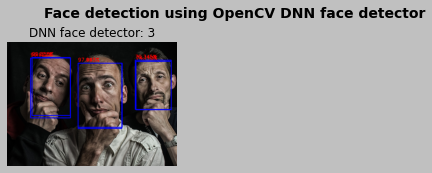

In [ ]:
# Initialize the number of detected faces counter detected_faces
detected_faces = 0
# Iterate over all detections
for i in range(0, detections.shape[2]):
    # Get the confidence (probability) of the current detection:
    confidence = detections[0, 0, i, 2]

    # Only consider detections if confidence is greater than a fixed minimum confidence:
    if confidence > 0.7:
        # Increment the number of detected faces:
        detected_faces += 1
        # Get the coordinates of the current detection:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw the detection and the confidence:
        text = "{:.3f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 3)
        cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(10, 5))
plt.suptitle("Face detection using OpenCV DNN face detector", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images:
show_img_with_matplotlib(image, "DNN face detector: " + str(detected_faces), 1)

# Show the Figure:
plt.show()

As can be seen, the three faces are detected with high confidence.

## Face detection with dlib

You can use dlib.get_frontal_face_detector() to create a frontal face detector,
which is based on **Histogram of Oriented Gradients (HOG)** features and a linear classifier in a sliding window detection approach. In particular, the HOG trainer uses a structural SVM-based training algorithm that enables the trainer to train in all the sub-windows in every training image. 

This face detector has been trained using 3,000 images from the **Labeled Faces in the Wild** (http://vis-www.cs.umass.edu/lfw/) dataset. It should be noted
that this detector can also be used to spot objects other than faces.

In [ ]:
def show_detection(image, faces):
    """Draws a rectangle over each detected face"""

    for face in faces:
        cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (255, 0, 0), 10)
    return image

### dlib HOG face detector

The first step is to load the frontal face detector from dlib.

In [ ]:
detector = dlib.get_frontal_face_detector()

The next step is to perform the detection.

In [ ]:
rects_1 = detector(img_gray, 0)
rects_2 = detector(img_gray, 1)

The second argument indicates that the image is upsampled 1 time before the detection process is carried out, allowing the detector to detect more faces because the image is bigger. On the contrary, the execution time will be increased. Therefore, this should be taken into account for performance purposes.

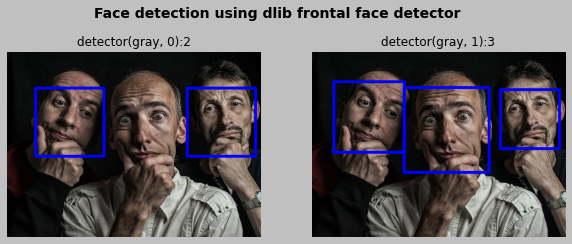

In [ ]:
# Draw face detections
img_faces_1 = show_detection(img.copy(), rects_1)
img_faces_2 = show_detection(img.copy(), rects_2)

# Create the dimensions of the figure and set title
fig = plt.figure(figsize=(10, 4))
plt.suptitle("Face detection using dlib frontal face detector", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images
show_img_with_matplotlib(img_faces_1, "detector(gray, 0):" + str(len(rects_1)), 1)
show_img_with_matplotlib(img_faces_2, "detector(gray, 1):" + str(len(rects_2)), 2)

plt.show()

As you can see, if we detect faces using the original grayscale image (rects_1 =
detector(gray, 0)), only two faces are found. However, if we detect faces using the grayscale image upsampled 1 time (rects_2 = detector(gray, 1)), the three faces are correctly detected.



### dlib CNN face detector

The dlib library also offers a CNN face detector. You can use
dlib.cnn_face_detection_model_v1() to create the CNN face detector. The
constructor loads the face detection model from a file. You can download a pre-trained model (712 KB) from http://dlib.net/files/mmod_human_face_detector.dat.bz2. 

When creating the CNN face detector, the corresponding pre-trained model should be passed to this method:

In [ ]:
%%shell

wget http://dlib.net/files/mmod_human_face_detector.dat.bz2
bzip2 -d mmod_human_face_detector.dat.bz2

--2021-02-10 08:38:29--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  1.21MB/s    in 0.5s    

2021-02-10 08:38:29 (1.21 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [ ]:
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

At this point, we are ready to spot faces using this detector

In [ ]:
rects = cnn_face_detector(img, 0)

This detector spots a mmod_rectangles object, which is a list of mmod_rectangle objects, and the mmod_rectangle object has two member variables—a dlib.rectangle object, and a confidence score.

Therefore, to show the detections, the show_detection() function is coded as follow:

In [ ]:
def show_detection(image, faces):
    """Draws a rectangle over each detected face"""

    # faces contains a list of mmod_rectangle objects
    """
    The mmod_rectangle object has two member variables, a dlib.rectangle object, and a confidence score
    Therefore, we iterate over the detected mmod_rectangle objects accessing dlib.rect to draw the rectangle
    """
    for face in faces:
        cv2.rectangle(image, (face.rect.left(), face.rect.top()), (face.rect.right(), face.rect.bottom()), (255, 0, 0), 10)
    return image

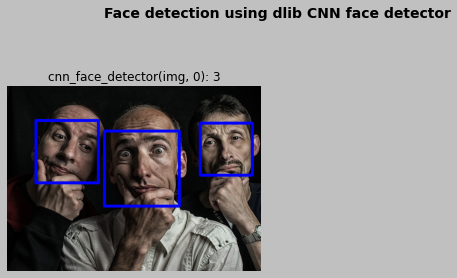

In [ ]:
# Draw face detections
img_faces = show_detection(img.copy(), rects)

# Create the dimensions of the figure and set title
fig = plt.figure(figsize=(10, 5))
plt.suptitle("Face detection using dlib CNN face detector", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images
show_img_with_matplotlib(img_faces, "cnn_face_detector(img, 0): " + str(len(rects)), 1)

plt.show()

The dlib CNN face detector is much more accurate than the dlib HOG face detector, but it takes much more computational power to run. For example, for a 600 x 400 image, the HOG face detector takes around 0.25 seconds, while CNN face detector takes around 5. Indeed, the CNN face detector is meant to be executed on a GPU in order to attain a reasonable speed.

## Face detection with face_recognition

With the aim of detecting faces using face_recognition,
the face_locations() function should be called:

In [10]:
def show_detection(image, faces):
    """Draws a rectangle over each detected face"""

    for face in faces:
        top, right, bottom, left = face
        cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 10)
    return image

In [7]:
# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
rgb = img[:, :, ::-1]

### face_recognition HOG face detector

The first parameter is the input (RGB) image. The second parameter sets how many times the input image is upsampled before the detection process has been carried out. The third parameter determines which face detection model will be used.

In [8]:
rects_1 = face_recognition.face_locations(rgb, 0, "hog")
rects_2 = face_recognition.face_locations(rgb, 1, "hog")

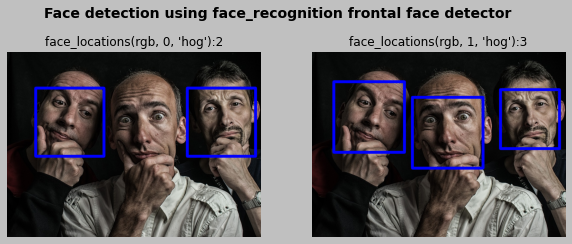

In [11]:
# Draw face detections
img_faces_1 = show_detection(img.copy(), rects_1)
img_faces_2 = show_detection(img.copy(), rects_2)

# Create the dimensions of the figure and set title
fig = plt.figure(figsize=(10, 4))
plt.suptitle("Face detection using face_recognition frontal face detector", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images
show_img_with_matplotlib(img_faces_1, "face_locations(rgb, 0, 'hog'):" + str(len(rects_1)), 1)
show_img_with_matplotlib(img_faces_2, "face_locations(rgb, 1, 'hog'):" + str(len(rects_2)), 2)

plt.show()

### face_recognition CNN face detector

In [12]:
def show_detection(image, faces):
    """Draws a rectangle over each detected face"""

    for face in faces:
        top, right, bottom, left = face
        cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 3)
    return image

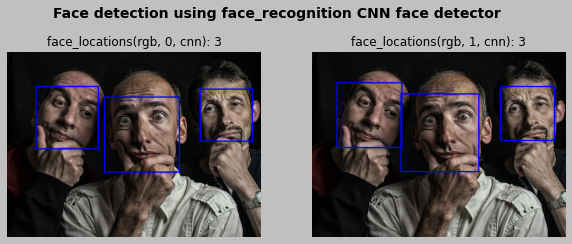

In [13]:
# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
rgb = img[:, :, ::-1]

# Perform face detection using face_recognition (internally using dlib CNN face detection):
rects_1 = face_recognition.face_locations(rgb, 0, "cnn")
rects_2 = face_recognition.face_locations(rgb, 1, "cnn")

# Draw face detections:
img_faces_1 = show_detection(img.copy(), rects_1)
img_faces_2 = show_detection(img.copy(), rects_2)

# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(10, 4))
plt.suptitle("Face detection using face_recognition CNN face detector", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images:
show_img_with_matplotlib(img_faces_1, "face_locations(rgb, 0, cnn): " + str(len(rects_1)), 1)
show_img_with_matplotlib(img_faces_2, "face_locations(rgb, 1, cnn): " + str(len(rects_2)), 2)

# Show the Figure:
plt.show()

Remember that the face_processing library internally uses both the HOG and CNN
dlib face detectors.

## Face detection with cvlib

For the sake of completeness, we are introducing the cvlib package in this section because it also provides an algorithm for face detection. This library is a simple, high-level and easyto- use open source computer vision library for Python.

In order to detect faces with cvlib, you can use the detect_face() function, which will return the bounding boxes and corresponding confidences for all detected faces:

In [2]:
def show_detection(image, faces):
    """Draws a rectangle over each detected face"""

    for (startX, startY, endX, endY) in faces:
        cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 3)

    return image

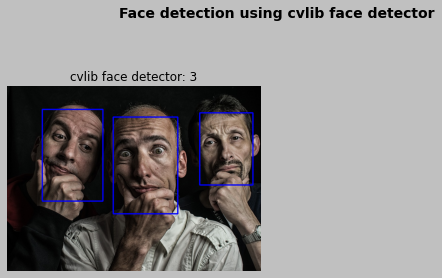

In [8]:
# Load image
#image = cv2.imread("test_face_detection.jpg")

# Detect faces
faces, confidences = cv.detect_face(img)

# Draw face detections
img_result = show_detection(image.copy(), faces)

# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(10, 5))
plt.suptitle("Face detection using cvlib face detector", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images:
show_img_with_matplotlib(img_result, "cvlib face detector: " + str(len(faces)), 1)

# Show the Figure:
plt.show()

Under the hood, this function is using the OpenCV DNN face detector with pre-trained Caffe models (https://github.com/arunponnusamy/cvlib/blob/master/cvlib/face_detection.py).